# Vivek's blog

#### Note to reader:

This is an archive of algorithms that I have imlemented. I have tried to do it in the style of an instructional blog to facilitate code readability in the future for myself. I will be greatful if you find and report bugs. Suggestions about improving implementations are always welcome. Feel free to reuse my code in any form or manner you deem fit.

## Implementing gradient descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import urllib2
import math
from matplotlib import style
style.use('ggplot')
%matplotlib inline

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# downloading data 
dataFile = urllib2.urlopen("http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/excel/slr06.xls")
parsedData = pd.ExcelFile(dataFile)
data = parsedData.parse
xPoints = np.round(np.array(data().X),2)
tmp = list(xPoints)
tmp = [[_,np.random.random()*_] for _ in xPoints]
xPoints = tmp
yPoints = np.round(np.array(data().Y),2)
print("-"*100)
print"xPoints: ", xPoints
print("-"*100)
print"yPoints: ",yPoints
print("-"*100)
print"Combined coordinates: ",[_ for _ in zip(xPoints,yPoints)]

*** No CODEPAGE record, no encoding_override: will use 'ascii'
----------------------------------------------------------------------------------------------------
xPoints:  [[108, 74.64152410298013], [19, 13.524680559993387], [13, 7.609140184149328], [124, 8.062398070858704], [40, 30.521728364285018], [57, 44.23606501385153], [23, 21.15499361599814], [14, 13.789323500789948], [45, 41.99880160207271], [10, 9.367580698306263], [5, 3.121413450820965], [48, 30.558467374483445], [11, 7.727102555756799], [23, 11.968483428355965], [7, 0.31072677116281056], [2, 0.14200499657980048], [24, 14.06784473535625], [6, 1.3272407405800133], [3, 2.654841140988901], [23, 21.34052373812086], [6, 1.8835165950263675], [9, 1.365754371591949], [9, 0.36779750773639397], [3, 1.6602275705705454], [29, 14.225145771958145], [7, 5.585770032162545], [4, 0.17820021186676005], [20, 10.254206177255336], [7, 4.982516483316293], [4, 3.486302797324578], [0, 0.0], [25, 9.936905182253788], [6, 3.6474501037521025], [5, 4.77

##### Plotting X vs Y in every dimension of X

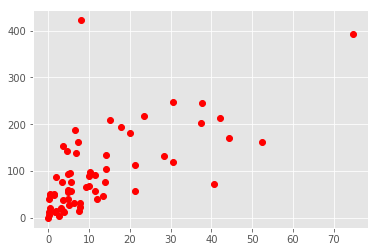

In [4]:
plt.plot([x[1] for x in xPoints],yPoints,'ro')

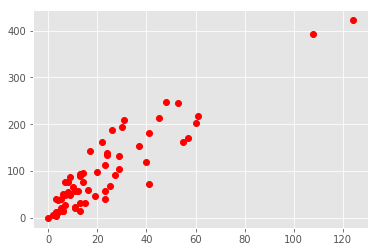

In [5]:
plt.plot([x[0] for x in xPoints],yPoints,'ro')


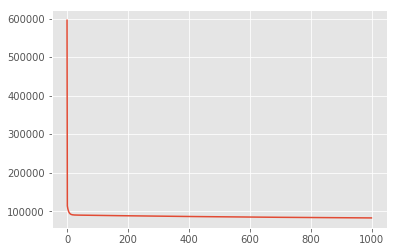

In [6]:
# initialize everything formally
y = np.array(yPoints)
x = np.array(xPoints)
m = np.array([np.random.random() for _ in range(np.shape(x)[1])])
c = np.array(np.random.random())

# model prediction
#yhat = np.sum(m*x, axis= 1) +c
# building parameter vector
theta = np.append(m,c)
# adding the intercept term to every X i.e. [2.2,4.5] becomes [2.2, 4.5, 1] 
xPoints =  np.append(xPoints,np.reshape(np.repeat(1,np.shape(xPoints)[0]), newshape=(np.shape(xPoints)[0],1)),axis=1)
# now prediction with intercet term
yhat = np.sum(theta*xPoints, axis= 1) # this implements yhat = m*x + c
# learning rate
alpha = 0.001
# delTheta = (2.0/len(xPoints))*(np.sum(theta*(xPoints),axis=1) - yPoints)*np.sum(xPoints,axis=1)
errorArray = []
delparamArray = []
temp = np.zeros(theta.shape)
for _ in range(1000):
    for ind in range(len(theta)):
        yhat = np.sum(theta*xPoints, axis= 1)
        error = (yhat - y)
        
        delParam = np.multiply(error, xPoints[:,ind])
        temp[ind] = theta[ind] - ((alpha / len(xPoints)) * np.sum(delParam))
    errorArray.append(np.sum((yhat-y)**2))
    theta = temp


    
plt.plot(errorArray)

##### Now to verify that there isn't something screwey with the implementation, I will cross validate my parameter vector with scikit learn

In [7]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(xPoints, yPoints)
print('Scikit Coefficients: \n', regr.coef_)
print('Coefficients in current imlementaton: \n',theta)

('Scikit Coefficients: \n', array([ 3.57815255, -0.35057491,  0.        ]))
('Coefficients in current imlementaton: \n', array([ 3.77534517, -0.22612594,  8.61979239]))


##### Comparing model performances

In [8]:
print("Mean squared error scikit: %.2f" % np.mean((regr.predict(xPoints) - yPoints) ** 2))
print("Mean squared error current implementation: %.2f" % np.mean((np.sum(theta*xPoints, axis= 1) - yPoints)**2))

Mean squared error scikit: 1238.63
Mean squared error current implementation: 1310.99


#### Lets just say we didn't do too terribly, but talk is cheap, so we will do a significance test between the two error populations

Our null hyothesis being that the two error distributions come from the same bigger distribution

In [20]:
# putting both error distributions in a dataframe

scikitErrors = (regr.predict(xPoints) - yPoints)
nativeErrors = (np.sum(theta*xPoints, axis= 1) - yPoints)

In [21]:
import scipy.stats as stats

stats.ttest_rel(a = scikitErrors,
                b = nativeErrors)

(7.7902896371109502, 9.1488892033548435e-11)

#### Okay, The p-value (9.1488892033548435e-11) in the test output shows that the chances of seeing this large of a difference between samples due to chance is just over none - this means the model is doing well enough.

In plain english, this means that we have a good implementation. Hurrayyy!!!



63